In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset_renaming = {
    "mendelian_traits_matched_9": "Mendelian traits",
    "complex_traits_matched_9": "Complex traits",
}

subset_renaming = {
    "nonexonic_AND_proximal": "Non-exonic\n(proximal)",
}

model_renaming = {
    "v2_all_256_256_512_17_512": "gLM-Promoter-Medium",
    "v2_all_256_256_512_25_768": "gLM-Promoter-Large",
    "v4_v6_512_64_1024": "gLM-Promoter",
}

checkpoint_renaming = {
}

score_renaming = {
    "LLR.minus.score": "LLR",
    "InnerProduct.minus.score": "Inner product",
    "EuclideanDistance.plus.score": "Euclidean distance",
    "Influence.plus.score": "Influence score",
}

In [3]:
datasets = [
    "mendelian_traits_matched_9",
    "complex_traits_matched_9",
]

subsets = [
    "nonexonic_AND_proximal",
]

## gLM-Promoter

In [7]:
models = [
    #"v2_all_256_256_512_17_512",
    #"v2_all_256_256_512_25_768",
    "v4_v6_512_64_1024",
]

checkpoints = [
    10000,
    50000,
    100000,
    150000,
]

scores = [
    "LLR.minus.score",
    "InnerProduct.minus.score",
    "EuclideanDistance.plus.score",
    "Influence.plus.score",
]

def get_model_path(dataset, subset, model, checkpoint, score):
    return (
        f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/{subset}/"
        f"GPN_{model}_checkpoint_{checkpoint}_{score}.csv"
    )

In [8]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for model in models:
            for checkpoint in checkpoints:
                for score in scores:
                    score_for_path = score
                    if "complex" in dataset and score == "LLR.minus.score":
                        score_for_path = "absLLR.plus.score"
                    path = get_model_path(
                        dataset, subset, model, checkpoint, score_for_path
                    )
                    df = pd.read_csv(path).iloc[0]
                    rows.append([
                        dataset_renaming.get(dataset, dataset),
                        subset_renaming.get(subset, subset),
                        model_renaming.get(model, model),
                        checkpoint_renaming.get(checkpoint, checkpoint),
                        score_renaming.get(score, score),
                        df["score"],
                        df["se"],
                    ])
df = pd.DataFrame(rows, columns=["dataset", "subset", "model", "Iters", "score", "AUPRC", "se"])
df

,dataset,subset,model,Iters,score,AUPRC,se
0,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,10000,LLR,0.225116,0.043169
1,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,10000,Inner product,0.139022,0.024869
2,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,10000,Euclidean distance,0.270287,0.045011
3,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,10000,Influence score,0.287288,0.056325
4,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,50000,LLR,0.298255,0.050414
5,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,50000,Inner product,0.132486,0.023925
6,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,50000,Euclidean distance,0.374375,0.044060
7,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,50000,Influence score,0.314958,0.039108
8,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,100000,LLR,0.401794,0.043677
9,Mendelian traits,Non-exonic\n(proximal),gLM-Promoter,100000,Inner product,0.131912,0.024764


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

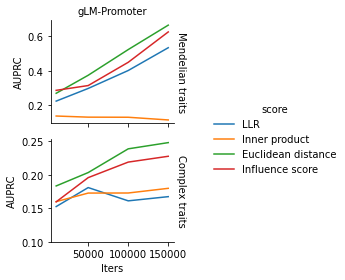

In [10]:
g = sns.relplot(
    kind="line",
    data=df,
    row="dataset",
    col="model",
    x="Iters",
    y="AUPRC",
    hue="score",
    height=2.0,
    aspect=1.5,
    facet_kws=dict(
        sharey="row",
        margin_titles=True,
    ),
)
g.set(
    ylim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    #fontweight="bold",
)
g.tight_layout()

## GPN-MSA

In [4]:
scores = [
    "LLR.minus.score",
    "InnerProduct.minus.score",
    "EuclideanDistance.plus.score",
    "Influence.plus.score",
]

def get_model_path(dataset, subset, score):
    return (
        f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/{subset}/"
        f"GPN-MSA_{score}.csv"
    )

In [5]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for score in scores:
            score_for_path = score
            if "complex" in dataset and score == "LLR.minus.score":
                score_for_path = "absLLR.plus.score"
            path = get_model_path(
                dataset, subset, score_for_path
            )
            df = pd.read_csv(path).iloc[0]
            rows.append([
                dataset_renaming.get(dataset, dataset),
                subset_renaming.get(subset, subset),
                score_renaming.get(score, score),
                df["score"],
                df["se"],
            ])
df = pd.DataFrame(rows, columns=["dataset", "subset", "score", "AUPRC", "se"])
df

,dataset,subset,score,AUPRC,se
0,Mendelian traits,Non-exonic\n(proximal),LLR,0.742770,0.034461
1,Mendelian traits,Non-exonic\n(proximal),Inner product,0.423912,0.045098
2,Mendelian traits,Non-exonic\n(proximal),Euclidean distance,0.316762,0.031919
3,Mendelian traits,Non-exonic\n(proximal),Influence score,0.411481,0.041147
4,Complex traits,Non-exonic\n(proximal),LLR,0.342338,0.024915
5,Complex traits,Non-exonic\n(proximal),Inner product,0.292900,0.037915
6,Complex traits,Non-exonic\n(proximal),Euclidean distance,0.269290,0.041181
7,Complex traits,Non-exonic\n(proximal),Influence score,0.296089,0.039016


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

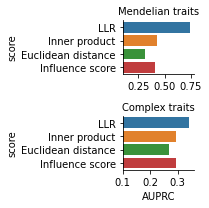

In [10]:
g = sns.catplot(
    kind="bar",
    data=df,
    row="dataset",
    x="AUPRC",
    y="score",
    height=1.5,
    aspect=2.0,
    sharex=False,
    #facet_kws=dict(
    #    sharex=False,
    #    margin_titles=True,
    #),
)
g.set(
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
)
g.tight_layout()